# Exploratory Data Analysis of London Bike Sharing (2015–2017)

This project analyses historical data of London's bike sharing usage, provided by TfL Open Data, from January 2015 to March 2017. The goal is to identify patterns in bike usage based on time, weather, and seasonal conditions through data cleaning, visualizations, and insights generation.

### Metadata

- **is_holiday**: Indicates whether the day is a holiday (1.0) or not (0.0).
- **is_weekend**: Indicates whether the day is a weekend (1.0).
- **season**:
    - 0.0: Spring
    - 1.0: Summer
    - 2.0: Fall
    - 3.0: Winter
- **weather_code**:
    - 1.0: Clear
    - 2.0: Scattered clouds
    - 3.0: Broken clouds
    - 4.0: Cloudy
    - 7.0: Light rain
    - 10.0: Rain with thunderstorm
    - 26.0: Snowfall
    - 94.0: Freezing Fog



# Imports

In [265]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Plot style
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

In [267]:
# Download dataset
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset -p ./data --unzip

# Read the file
df = pd.read_csv('./data/london_merged.csv')

# Show the first rows
df.head()

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other




  0%|          | 0.00/165k [00:00<?, ?B/s]
100%|##########| 165k/165k [00:00<00:00, 16.6MB/s]


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [269]:
print(df.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [271]:
# Data cleaning and formating

In [273]:
# check if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    print(f'{col:<20} - {pct_missing:.2f}%')

timestamp            - 0.00%
cnt                  - 0.00%
t1                   - 0.00%
t2                   - 0.00%
hum                  - 0.00%
wind_speed           - 0.00%
weather_code         - 0.00%
is_holiday           - 0.00%
is_weekend           - 0.00%
season               - 0.00%


In [275]:
# Check duplicated rows:

duplicated_rows = df.duplicated()
distribution = duplicated_rows.value_counts()
print(distribution.rename({False: "No duplicated", True: "Duplicated"}))

No duplicated    17414
Name: count, dtype: int64


In [277]:
# rename columns

new_cols_dict = {
    'timestamp': 'time',
    'cnt': 'count_bikes',
    't1': 'temp Cº',
    't2': 'feels like Cº',
    'hum': 'hum%',
    'wind_speed': 'wind_speed_km/h',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

df.rename(new_cols_dict, axis=1, inplace=True)

In [279]:
df

,time,count_bikes,temp Cº,feels like Cº,hum%,wind_speed_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [281]:
# dictionary for season / weather / is holiday / is weekend columns. 

weather_dict = {
    1.0: 'Clear',
    2.0: 'Scattered clouds',
    3.0: 'Broken clouds',
    4.0: 'Cloudy',
    7.0: 'Light rain',
    10.0: 'Rain with thunderstorm',
    26.0: 'Snowfall',
    96.0: 'Freezing Fog'
}

season_dict ={
     0.0: 'Spring',
     1.0: 'Summer',
     2.0: 'Fall',
     3.0: 'Winter'
}

is_holiday_dict ={
     0.0: 'Non Holiday',
     1.0: 'Holiday'
}

is_weekend_dict ={
     0.0: 'Weekday',
     1.0: 'Weekend'
}

# mapping new values

df['weather'] = df['weather'].map(weather_dict)
df['season'] = df['season'].map(season_dict)
df['is_holiday'] = df['is_holiday'].map(is_holiday_dict)
df['is_weekend'] = df['is_weekend'].map(is_weekend_dict)


In [283]:
df

,time,count_bikes,temp Cº,feels like Cº,hum%,wind_speed_km/h,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non Holiday,Weekend,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non Holiday,Weekend,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non Holiday,Weekend,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non Holiday,Weekend,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non Holiday,Weekend,Winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken clouds,Non Holiday,Weekday,Winter
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,Non Holiday,Weekday,Winter
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,Non Holiday,Weekday,Winter
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,Cloudy,Non Holiday,Weekday,Winter


In [289]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['date'] = df['time'].dt.date
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.day_name()

In [291]:
df

,time,count_bikes,temp Cº,feels like Cº,hum%,wind_speed_km/h,weather,is_holiday,is_weekend,season,date,year,month,day,hour,weekday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non Holiday,Weekend,Winter,2015-01-04,2015,1,4,0,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non Holiday,Weekend,Winter,2015-01-04,2015,1,4,1,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,Non Holiday,Weekend,Winter,2015-01-04,2015,1,4,2,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,Non Holiday,Weekend,Winter,2015-01-04,2015,1,4,3,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,Non Holiday,Weekend,Winter,2015-01-04,2015,1,4,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken clouds,Non Holiday,Weekday,Winter,2017-01-03,2017,1,3,19,Tuesday
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,Non Holiday,Weekday,Winter,2017-01-03,2017,1,3,20,Tuesday
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,Non Holiday,Weekday,Winter,2017-01-03,2017,1,3,21,Tuesday
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,Cloudy,Non Holiday,Weekday,Winter,2017-01-03,2017,1,3,22,Tuesday


# Relationship between temperature, wind speed and the quantity of bikes shared

In [295]:
# pivot table to show the Relationship

# bins
temp_bins = pd.cut(df['temp Cº'], bins=range(-2, 36, 2), right=False)
wind_bins = pd.cut(df['wind_speed_km/h'], bins=range(0, 57, 5), right=False)

# pivot table
pivot_table = pd.pivot_table(df, index=wind_bins, columns=temp_bins, values='count_bikes', aggfunc='sum', fill_value=0, observed=False)

pivot_table


temp Cº,"[-2, 0)","[0, 2)","[2, 4)","[4, 6)","[6, 8)","[8, 10)","[10, 12)","[12, 14)","[14, 16)","[16, 18)","[18, 20)","[20, 22)","[22, 24)","[24, 26)","[26, 28)","[28, 30)","[30, 32)","[32, 34)"
wind_speed_km/h,,,,,,,,,,,,,,,,,,
"[0, 5)",2870,25411,29017,35945,41213,65766,50752,61336,33931,32732,24940,8808,5831,0,0,3723,0,0
"[5, 10)",18016,51104,113049,213961,257892,362696,366758,402379,350236,366456,279322,206632,121862,78136,32299,25323,3584,4614
"[10, 15)",1198,20122,135326,229265,351769,362404,442651,523378,537297,548745,515695,333298,241706,108907,62057,20042,6605,7867
"[15, 20)",77,12353,74767,140419,372470,439504,407996,684925,722533,683397,610591,579243,348973,195949,61684,23630,29933,18440
"[20, 25)",0,0,32540,95163,176632,267470,310371,339334,363314,482439,410590,397046,230865,98885,72739,30236,15339,5853
"[25, 30)",0,0,3205,55029,99943,172207,214870,270965,227982,190864,201796,215854,198380,73933,22160,2720,5046,0
"[30, 35)",0,0,140,22044,41835,63365,91754,155243,104526,81686,66580,40911,49764,28090,10289,0,0,0
"[35, 40)",0,0,0,2427,20234,17958,37448,55804,43024,23216,12767,9234,0,0,0,0,0,0
"[40, 45)",0,0,0,0,1266,7690,17024,13277,16495,13568,2631,0,0,0,0,0,0,0


In [ ]:
# heatmap to see the data in a better way

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', annot_kws={'size': 8}, cbar_kws={'label': 'Quantity of bikes'})
plt.title('Number of bikes shared by Temperature and Wind Speed ranges')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind speed (km/h)')
plt.gca().invert_yaxis()
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.tight_layout()
plt.show()

Conclusion: The highest number of bike shares occurs when the temperature ranges between 6ºC and 24ºC, and the wind speed is between 5 and 25 km/h. This is likely because moderate temperatures make outdoor cycling more comfortable, avoiding extreme cold or heat that can discourage riders. Similarly, mild to moderate wind speeds create a pleasant riding experience, while very strong winds may deter people from using bikes.

# Distribution according to "Weather", " Season", "Weekend" and "Holiday"

## 1. Weather status

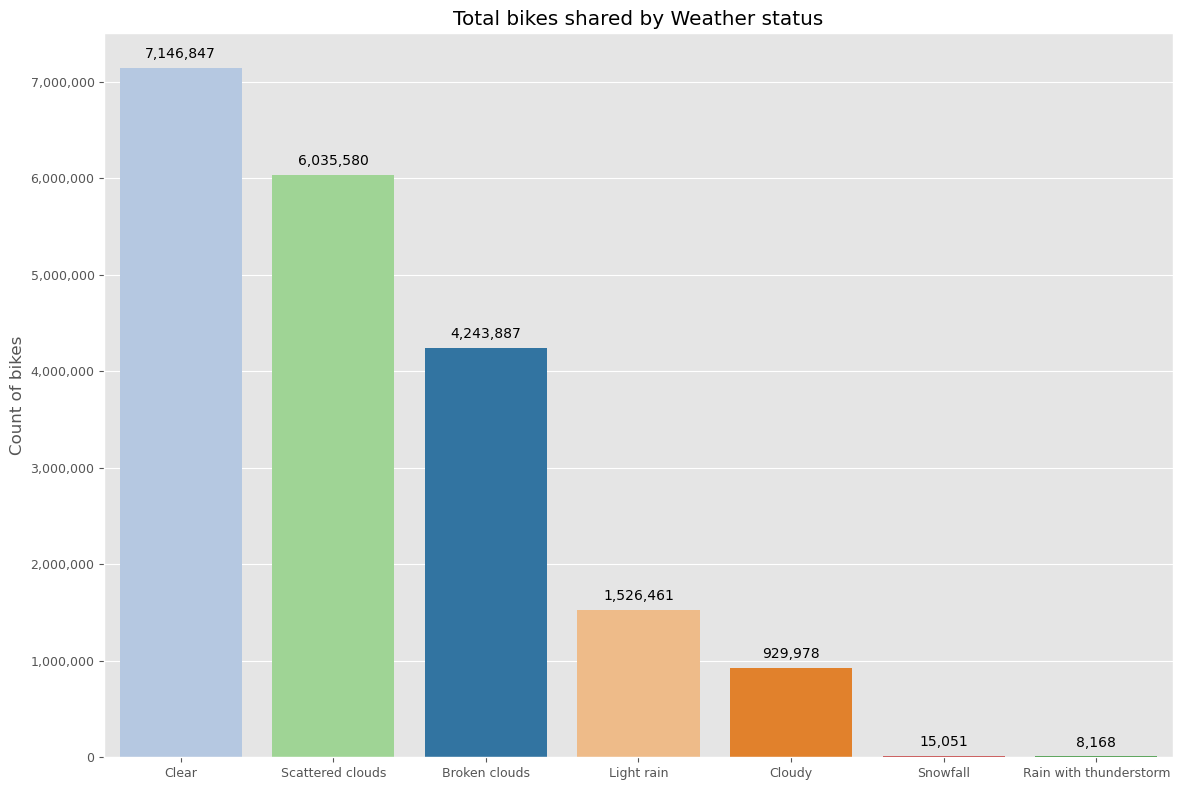

In [301]:
bike_demand_by_weather = df.groupby('weather')['count_bikes'].sum().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='weather',
    y='count_bikes',
    data=bike_demand_by_weather,
    hue='weather',
    palette="tab20",
    order=bike_demand_by_weather.sort_values('count_bikes', ascending=False)['weather'],
    legend=False
)

plt.title('Total bikes shared by Weather status')
plt.ylabel('Count of bikes')
plt.xlabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

for p in ax.patches:
    ax.annotate(
        '{:,.0f}'.format(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

Conclusion: The highest number of bike shares occurs when the weather is clear or partly cloudy. This suggests that pleasant weather conditions encourage people to use bikes, as they prefer riding when it’s neither rainy nor too cold or hot. Conversely, during rain, thunderstorms, or snowfall, bike usage significantly decreases, indicating that bad weather discourages people from using the bike-sharing service.

## 2. Season

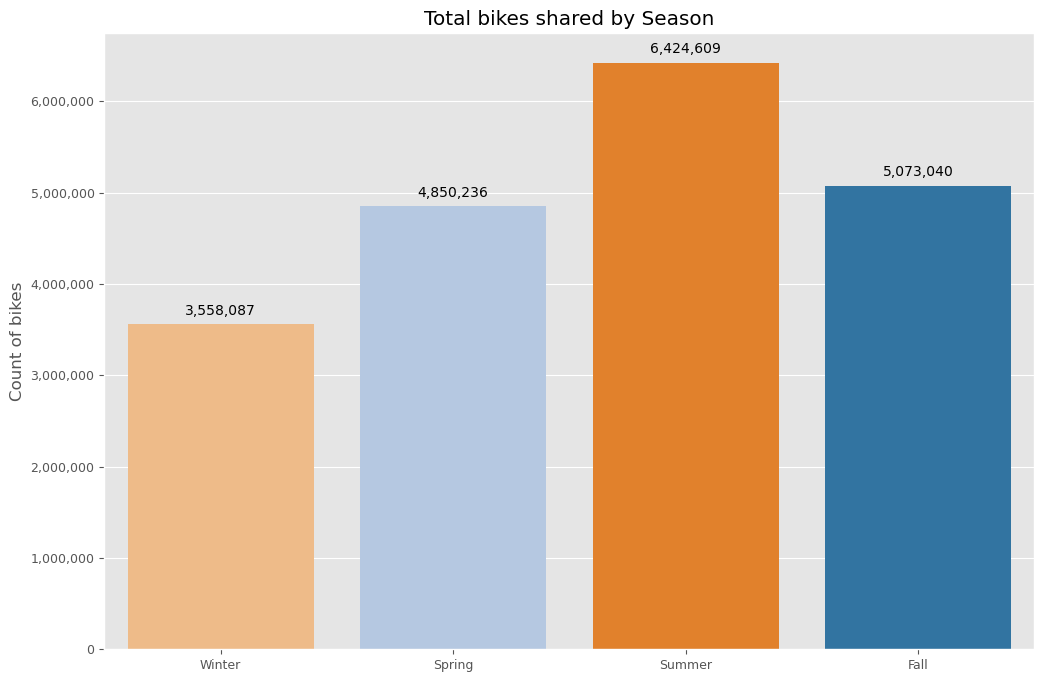

In [303]:
bike_demand_by_season = df.groupby('season')['count_bikes'].sum().reset_index()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='season', y='count_bikes', data=bike_demand_by_season, hue='season', palette="tab20", order=season_order, legend=False)
plt.title('Total bikes shared by Season')
plt.ylabel('Count of bikes')
plt.xlabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


Conclusion: Bikes are used during all seasons, mostly during summer and autumn. The variation between MAX (summer) and MIN (winter) is 44.6% less.Bike usage varies significantly across seasons. The highest number of bike shares occurs during Spring and Summer, likely due to more favorable weather conditions such as warmer temperatures and longer daylight hours. In contrast, Winter shows the lowest bike usage, probably because of colder temperatures and less comfortable riding conditions. Fall shows moderate usage, acting as a transition between Summer and Winter.

## 3. Weekend

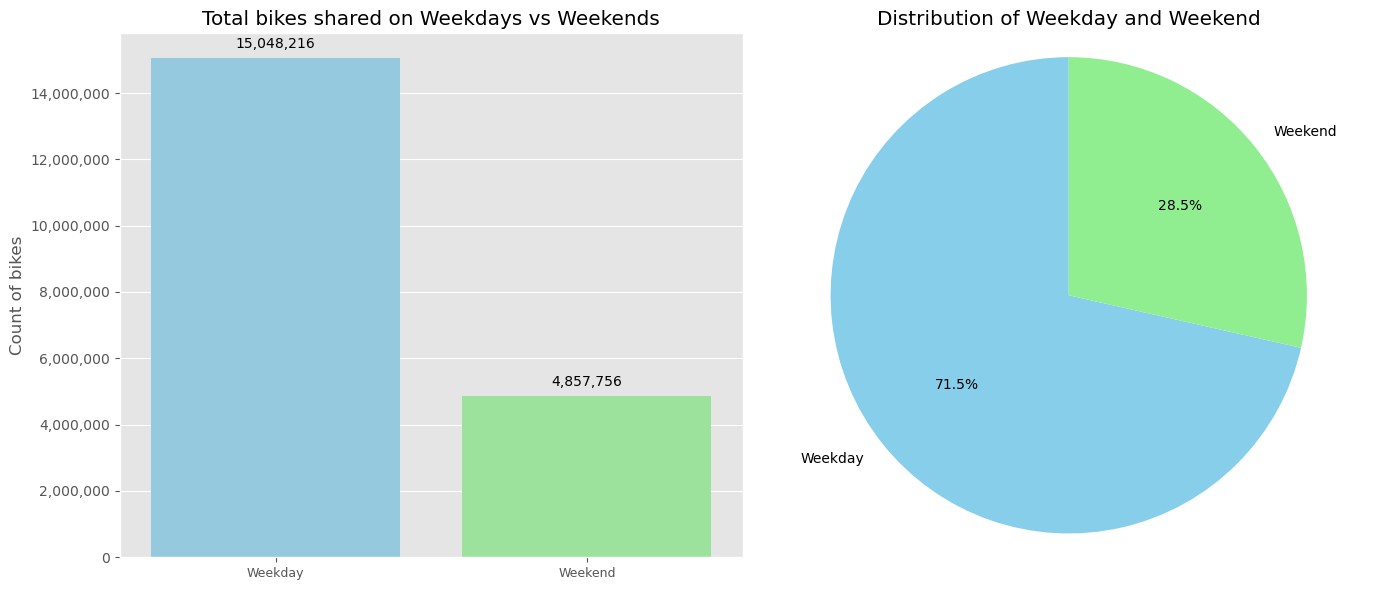

In [307]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
bike_demand_by_weekend = df.groupby('is_weekend')['count_bikes'].sum().reset_index()
ax = sns.barplot(x='is_weekend', y='count_bikes', data=bike_demand_by_weekend, palette=["skyblue", "lightgreen"], hue='is_weekend', ax=axes[0], legend=False)
ax.set_title('Total bikes shared on Weekdays vs Weekends')
ax.set_ylabel('Count of bikes')
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=9)

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Pie chart
weekday_percentage = (df['is_weekend'].value_counts(normalize=True) * 100).get('Weekday', 0)
weekend_percentage = (df['is_weekend'].value_counts(normalize=True) * 100).get('Weekend', 0)

axes[1].pie([weekday_percentage, weekend_percentage], labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[1].set_title('Distribution of Weekday and Weekend')
axes[1].axis('equal')
axes[1].tick_params(labelsize=9)

plt.tight_layout()
plt.show()


Conclusion: The analysis reveals a notable difference in bike-sharing demand between weekdays and weekends. Usage is significantly higher on weekdays, suggesting that people rely more on bikes for commuting or daily activities during the workweek. On weekends, bike usage decreases, which could be due to changes in routine or leisure activities. Understanding this pattern can help optimize bike availability and distribution based on day of the week to better meet user demand.

# 4. Holiday

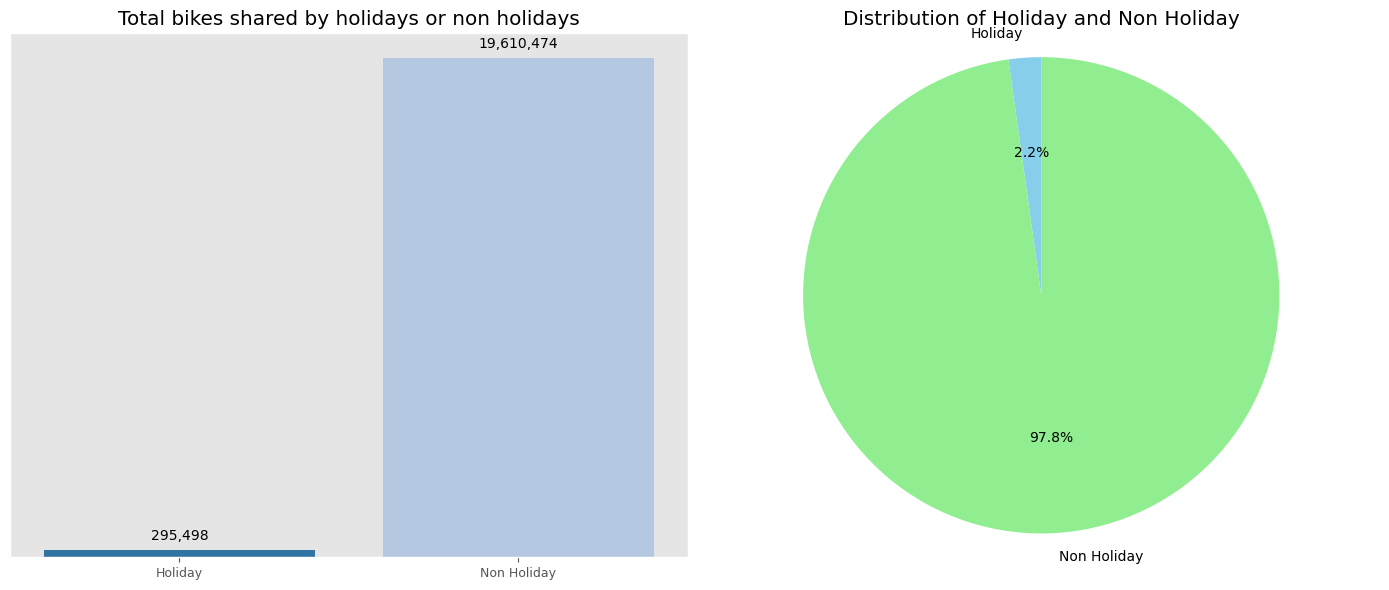

In [18]:
# Figure and matrix size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# bar graphic
bike_demand_by_holidays = df.groupby('is_holiday')['count_bikes'].sum().reset_index()
ax = sns.barplot(x='is_holiday', y='count_bikes', data=bike_demand_by_holidays, palette="tab20", ax=axes[0], hue='is_holiday', legend=False)
ax.set_title('Total bikes shared by holidays or non holidays')
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', labelsize=9)
ax.set_yticks([])

for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
    
# pie chart
weekday_percentage = (df['is_holiday'].value_counts(normalize=True) * 100)['Holiday']
weekend_percentage = (df['is_holiday'].value_counts(normalize=True) * 100)['Non Holiday']

axes[1].pie([weekday_percentage, weekend_percentage], labels=['Holiday', 'Non Holiday'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[1].set_title('Distribution of Holiday and Non Holiday')
axes[1].axis('equal')
axes[1].tick_params(labelsize=9)

# avoid overlaps
plt.tight_layout()

plt.show()

Conclusion: Bike-sharing demand is noticeably lower on holidays compared to non-holidays. This suggests that fewer people use bikes on holidays, possibly due to less commuting and more leisure activities that do not involve bike usage. The majority of bike rides occur on non-holiday days, indicating the importance of bikes as a transportation mode during regular working days. This insight can help in planning bike availability and maintenance schedules around holiday periods.

# Distribution by hour

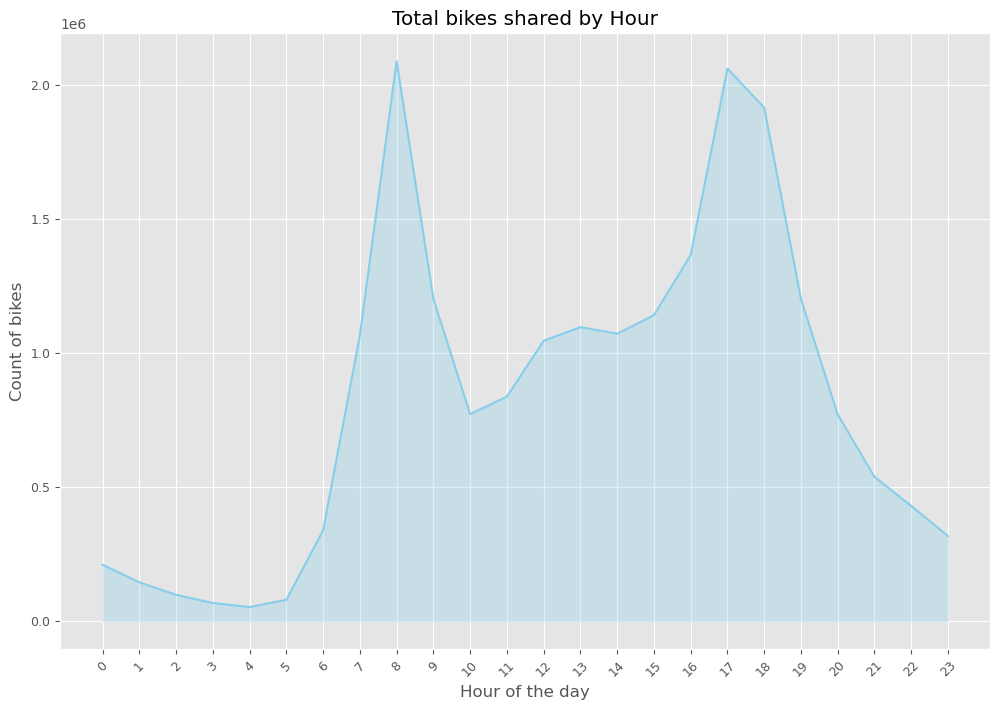

In [309]:
bike_demand_by_hour = df.groupby('hour')['count_bikes'].sum().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='hour', y='count_bikes', data=bike_demand_by_hour, color='skyblue')

plt.fill_between(bike_demand_by_hour['hour'], bike_demand_by_hour['count_bikes'], color='skyblue', alpha=0.3)

plt.title('Total bikes shared by Hour')
plt.ylabel('Count of bikes')
plt.xlabel('Hour of the day')
plt.xticks(bike_demand_by_hour['hour'], fontsize=9, rotation=45)
plt.yticks(fontsize=9)

plt.show()

Conclusion: Bike usage shows clear peaks during typical commuting hours, with the highest demand in the morning around 7-9 AM and in the evening around 5-7 PM. This pattern suggests that bikes are primarily used for commuting to and from work or school. Demand drops significantly during midday and late at night. Understanding this hourly distribution can help optimize bike availability and maintenance schedules.

# Bike Demand Prediction Using Linear Regression

Root Mean Squared Error (RMSE): 922.9901463812051
R-squared (R2): 0.2890333351584303


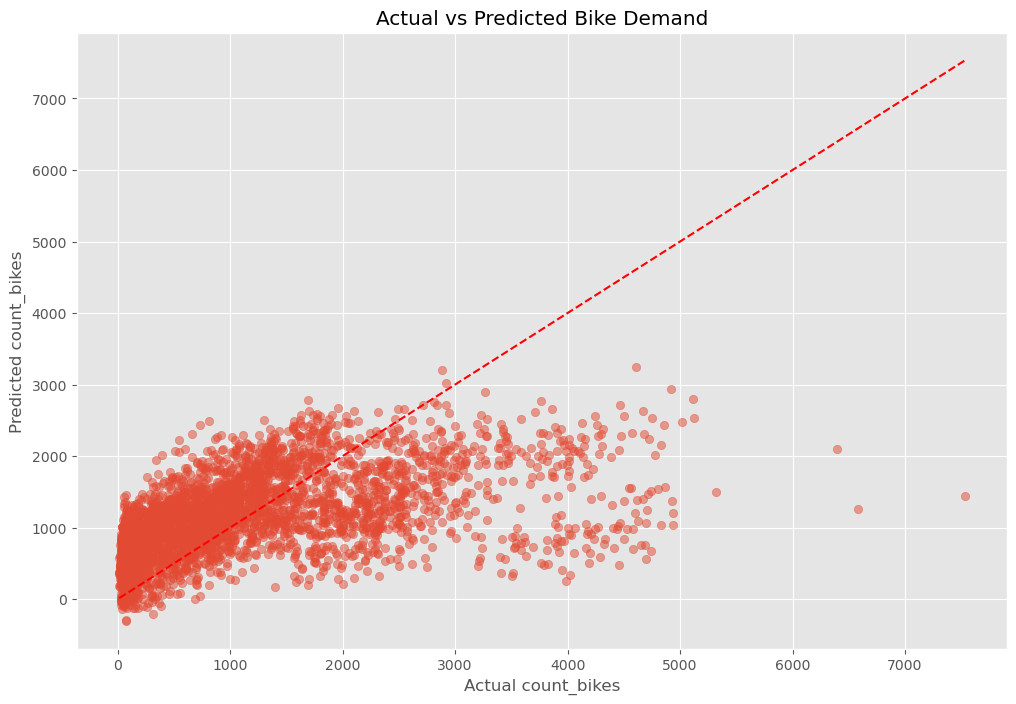

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Select predictor variables
X = df[['hour', 'temp Cº', 'hum%', 'wind_speed_km/h']].copy() #son las variables que usare para predecir, y hago una copia pano no modificar la original

# Convert categorical columns to numeric (0 or 1)
X['is_weekend'] = df['is_weekend'].map({'Weekday': 0, 'Weekend': 1})
X['is_holiday'] = df['is_holiday'].map({'Non Holiday': 0, 'Holiday': 1})

# Target variable
y = df['count_bikes']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test) 

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# Plot actual vs predicted bike demand
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual count_bikes')
plt.ylabel('Predicted count_bikes')
plt.title('Actual vs Predicted Bike Demand')
plt.show()


Conclusion:
The linear regression model explains about 29% of the variability in bike-sharing demand.
This means that hour, weather conditions, weekend, and holiday indicators partially explain the usage patterns.
The RMSE value indicates there's still significant error, so predictions can be improved.
Future steps could include adding more features or using more complex models to better capture demand patterns.